<a href="https://colab.research.google.com/github/aniketmodi-work/ML-NMIMS/blob/master/Lab_Assignments/ML_Lab_Exp_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import numpy as np

In [50]:
!wget -O AirQualityUCI.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip
!unzip AirQualityUCI.zip
df = pd.read_excel('/content/AirQualityUCI.xlsx', parse_dates=[['Date', 'Time']])
df.replace(to_replace=-200.0, value=0.0, inplace=True)
wv = df['NMHC(GT)']
bad_wv = wv == -200.0
wv[bad_wv] = 0.0

--2020-10-31 13:00:36--  https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1543989 (1.5M) [application/x-httpd-php]
Saving to: ‘AirQualityUCI.zip’

AirQualityUCI.zip   100%[===================>]   1.47M  3.78MB/s    in 0.4s    

2020-10-31 13:00:37 (3.78 MB/s) - ‘AirQualityUCI.zip’ saved [1543989/1543989]

Archive:  AirQualityUCI.zip
  inflating: AirQualityUCI.csv       
  inflating: AirQualityUCI.xlsx      


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [51]:
y = 'NO2(GT)'
y

'NO2(GT)'

In [52]:
df.isnull().sum()

Date_Time        0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date_Time      9357 non-null   datetime64[ns]
 1   CO(GT)         9357 non-null   float64       
 2   PT08.S1(CO)    9357 non-null   float64       
 3   NMHC(GT)       9357 non-null   int64         
 4   C6H6(GT)       9357 non-null   float64       
 5   PT08.S2(NMHC)  9357 non-null   float64       
 6   NOx(GT)        9357 non-null   float64       
 7   PT08.S3(NOx)   9357 non-null   float64       
 8   NO2(GT)        9357 non-null   float64       
 9   PT08.S4(NO2)   9357 non-null   float64       
 10  PT08.S5(O3)    9357 non-null   float64       
 11  T              9357 non-null   float64       
 12  RH             9357 non-null   float64       
 13  AH             9357 non-null   float64       
dtypes: datetime64[ns](1), float64(12), int64(1)
memory usage: 1023.5 KB


In [54]:
df.corr()[[y]]

,NO2(GT)
CO(GT),0.723154
PT08.S1(CO),0.284508
NMHC(GT),0.099541
C6H6(GT),0.402581
PT08.S2(NMHC),0.334108
NOx(GT),0.795888
PT08.S3(NOx),-0.440202
NO2(GT),1.000000
PT08.S4(NO2),0.010185
PT08.S5(O3),0.439057


In [55]:
df = df[['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)','PT08.S2(NMHC)', 'NOx(GT)','NO2(GT)','PT08.S5(O3)']]

In [56]:
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),NO2(GT),PT08.S5(O3)
0,2.6,1360.00,150,1045.50,166.0,113.0,1267.50
1,2.0,1292.25,112,954.75,103.0,92.0,972.25
2,2.2,1402.00,88,939.25,131.0,114.0,1074.00
3,2.2,1375.50,80,948.25,172.0,122.0,1203.25
4,1.6,1272.25,51,835.50,131.0,116.0,1110.00


In [57]:
X = df.drop(y,axis=1)
y = df[[y]]

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y)
value = y_test

In [59]:

print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)

(7017, 6)
(2340, 6)
(7017, 1)
(2340, 1)


In [60]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.fit_transform(x_train)
scaler.fit(x_test)
x_test = scaler.fit_transform(x_test)
scaler.fit(y_train)
y_train = scaler.fit_transform(y_train)
scaler.fit(y_test)
y_test = scaler.fit_transform(y_test)

In [61]:

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
print (x_train.shape)
print (x_test.shape)

(7017, 6, 1)
(2340, 6, 1)


In [62]:
print (y_train.shape)
print (y_test.shape)

(7017, 1)
(2340, 1)


In [63]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Flatten
def RNN_MODEL():
    
    regressor = Sequential()
    regressor.add(LSTM(units = 50,return_sequences = True))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units = 50,return_sequences = True))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units = 50))
    regressor.add(Dropout(0.2))
    regressor.add(Dense(units = 1))
    regressor.compile(optimizer = 'adam',loss = 'mean_squared_error',metrics=['accuracy'])
    return regressor

In [64]:
regressor = RNN_MODEL()

In [65]:
regressor.fit(x_train,y_train,epochs = 100)

Epoch 1/100
220/220 [==============================] - 2s 11ms/step - loss: 0.0256 - accuracy: 0.1750
Epoch 2/100
220/220 [==============================] - 2s 11ms/step - loss: 0.0208 - accuracy: 0.1750
Epoch 3/100
220/220 [==============================] - 2s 11ms/step - loss: 0.0182 - accuracy: 0.1744
Epoch 4/100
220/220 [==============================] - 2s 10ms/step - loss: 0.0172 - accuracy: 0.1746
Epoch 5/100
220/220 [==============================] - 2s 10ms/step - loss: 0.0166 - accuracy: 0.1750
Epoch 6/100
220/220 [==============================] - 2s 11ms/step - loss: 0.0157 - accuracy: 0.1750
Epoch 7/100
220/220 [==============================] - 2s 11ms/step - loss: 0.0158 - accuracy: 0.1749
Epoch 8/100
220/220 [==============================] - 2s 10ms/step - loss: 0.0154 - accuracy: 0.1749
Epoch 9/100
220/220 [==============================] - 2s 11ms/step - loss: 0.0151 - accuracy: 0.1749
Epoch 10/100
220/220 [==============================] - 2s 10ms/step - loss: 0.015

In [66]:
regressor.evaluate(x_test,y_test)

74/74 [==============================] - 0s 3ms/step - loss: 0.0058 - accuracy: 0.1774


[0.005763914901763201, 0.17735043168067932]

In [67]:
y_pred = regressor.predict(x_test)

In [68]:
y_pred


array([[ 0.39137158],
       [ 0.11744796],
       [ 0.379886  ],
       ...,
       [ 0.435088  ],
       [-0.00697231],
       [ 0.2316033 ]], dtype=float32)

In [69]:
output = scaler.inverse_transform(y_pred)
real_output = []
for item in output:
    real_output.append((item[0]))

In [70]:
real_output

[122.26448,
 36.690742,
 118.676384,
 148.94582,
 161.90991,
 82.233345,
 96.789986,
 67.53845,
 55.56714,
 164.6146,
 109.62127,
 130.18164,
 125.80431,
 57.649746,
 92.67419,
 95.8122,
 82.26012,
 166.61867,
 134.24214,
 -2.7369795,
 -2.3754904,
 -2.6591365,
 154.41168,
 80.56929,
 91.93715,
 149.88441,
 -2.186418,
 -2.0533094,
 117.13302,
 -2.3351958,
 131.91876,
 130.39046,
 114.09545,
 135.89784,
 143.07681,
 54.610252,
 158.98293,
 100.59656,
 80.47742,
 -1.8227413,
 192.9029,
 -1.1383544,
 218.92062,
 81.05792,
 23.4786,
 175.13712,
 120.77218,
 98.53426,
 129.97237,
 168.9528,
 75.78341,
 78.27646,
 38.88087,
 54.05487,
 75.293434,
 91.81533,
 162.12729,
 145.90604,
 83.2017,
 -2.296251,
 139.52235,
 142.0613,
 99.10501,
 101.31115,
 197.90678,
 77.05056,
 65.17,
 -1.6898282,
 124.22649,
 162.54495,
 36.456734,
 75.47237,
 117.572586,
 126.62,
 57.491966,
 98.200516,
 70.516464,
 -0.5072873,
 101.22263,
 37.83964,
 -2.7611954,
 174.60873,
 194.50119,
 48.28743,
 3.5189376,
 73.

In [71]:
value['predicted'] = np.array(real_output)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [72]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (100,100)
%matplotlib inline

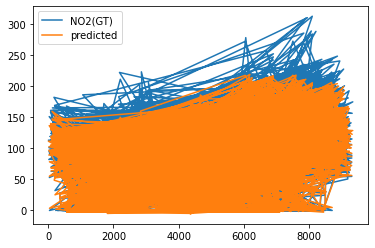

In [73]:
value.plot()